# Curate Yu 2021 - human fetal pancreatic cells

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
sc.set_figure_params(frameon=False)
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.8 umap==0.4.5 numpy==1.21.2 scipy==1.5.4 pandas==1.3.5 scikit-learn==0.22 statsmodels==0.13.2 python-igraph==0.8.0 louvain==0.7.0 leidenalg==0.7.0


## Data OMIX236

Data downloaded from [OMIX236](https://ngdc.cncb.ac.cn/omix/release/OMIX236)

## 10X data

In [3]:
adata = sc.read_csv('./data/Yu21/OMIX236-20-02.gz', delimiter='\t')

In [4]:
adata = adata.T

In [5]:
adata

AnnData object with n_obs × n_vars = 39398 × 22550

In [6]:
adata.obs['timepoint'] = [x.split('_')[0].split('.')[0] for x in adata.obs_names]
adata.obs['FACS'] = ['no FACS' if not 'EpCAM' in x.split('_')[0] else x.split('_')[0].split('.')[1] for x in adata.obs_names]
adata.obs['batch'] = [x.split('_')[1] for x in adata.obs_names]

In [7]:
pd.crosstab(adata.obs.timepoint, adata.obs.batch)

batch         1     2
timepoint            
W10        5284     0
W12        3945  8976
W14        2763     0
W16        3596     0
W18        4365     0
W19        2202     0
W8         8267     0

In [8]:
pd.crosstab(adata.obs.timepoint, columns=[adata.obs.batch, adata.obs.FACS])

batch           1              2               
FACS      no FACS EpCAMPosGP2Neg EpCAMPosGP2Pos
timepoint                                      
W10          5284              0              0
W12          3945           5259           3717
W14          2763              0              0
W16          3596              0              0
W18          4365              0              0
W19          2202              0              0
W8           8267              0              0

In [9]:
adata_strt = pd.read_csv('./data/Yu21/OMIX236-20-01.gz', sep='\t')

In [10]:
adata_strt

ID          Symbol  W9_1_EpCAM_Pos_001  \
0      ENSG00000000003          TSPAN6                  12   
1      ENSG00000000005            TNMD                   0   
2      ENSG00000000419            DPM1                   5   
3      ENSG00000000457           SCYL3                   0   
4      ENSG00000000460        C1orf112                   0   
...                ...             ...                 ...   
63249  ENSG00000283696  RP11-122G18.12                   0   
63250  ENSG00000283697    RP5-937E21.8                   0   
63251  ENSG00000283698   RP11-606M12.1                   0   
63252  ENSG00000283699         MIR4481                   0   
63253  ENSG00000283700       RNA5SP174                   0   

       W9_1_EpCAM_Pos_002  W9_1_EpCAM_Pos_003  W9_1_EpCAM_Pos_004  \
0                      50                   1                  13   
1                       0                   0                   0   
2                      15                   3                   2   
3                       1                   1                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
63249                   0                   0                   0   
63250                   0                   0                   0   
63251                   0                   0                   0   
63252                   0                   0                   0   
63253                   0                   0                   0   

       W9_1_EpCAM_Pos_005  W9_1_EpCAM_Pos_006  W9_1_EpCAM_Pos_007  \
0                       5                   8                   0   
1                       0                   0                   0   
2                       0                   3                   1   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
63249                   0                   0                   0   
63250                   0                   0                   0   
63251                   0                   0                   0   
63252                   0                   0                   0   
63253                   0                   0                   0   

       W9_1_EpCAM_Pos_008  ...  W19_1_No_Enrichment_208  \
0                       4  ...                        3   
1                       0  ...                        0   
2                       0  ...                        0   
3                       0  ...                        0   
4                       0  ...                        0   
...                   ...  ...                      ...   
63249                   0  ...                        0   
63250                   0  ...                        0   
63251                   0  ...                        0   
63252                   0  ...                        0   
63253                   0  ...                        0   

       W19_1_No_Enrichment_209  W19_1_No_Enrichment_210  \
0                            0                       26   
1                            0                        0   
2                            1                        3   
3                            0                        0   
4                            5                        0   
...                        ...                      ...   
63249                        0                        0   
63250                        0                        0   
63251                        0                        0   
63252                        0                        0   
63253                        0                        0   

       W19_1_No_Enrichment_211  W19_1_No_Enrichment_212  \
0                            0                        0   
1                            0                        0   
2                     

## Manifold and clustering

In [11]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)

In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [13]:
sc.tl.louvain(adata, resolution=0.5)

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'timepoint' as categorical
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FACS' as categorical
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in 

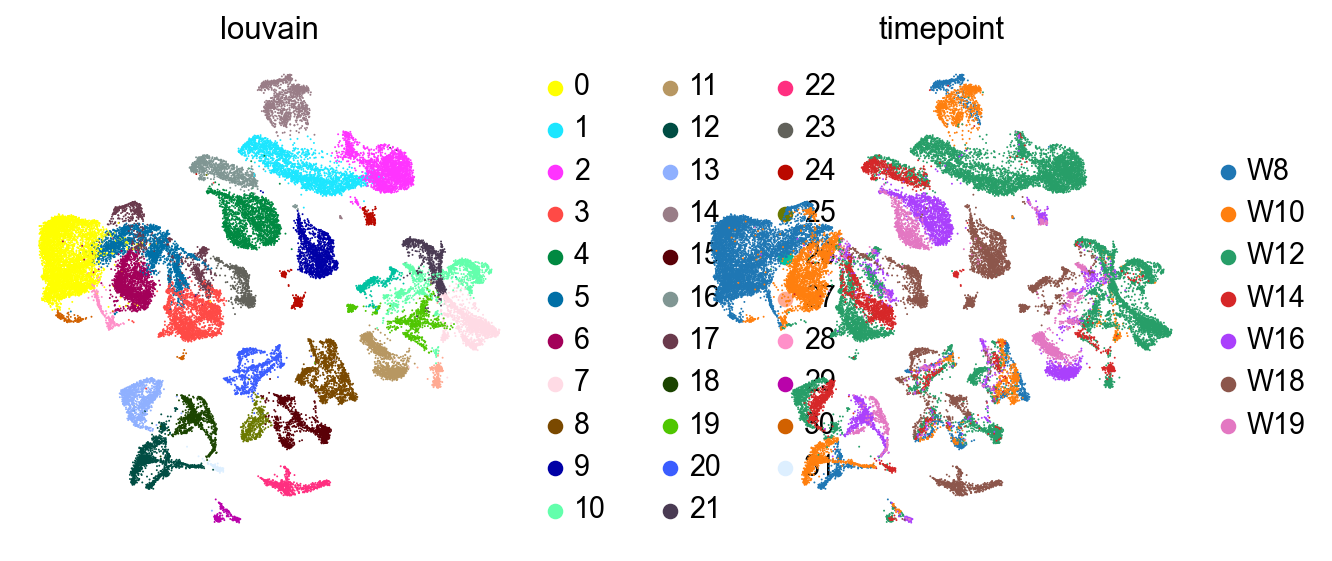

In [14]:
sc.pl.umap(adata, color=['louvain', 'timepoint'])

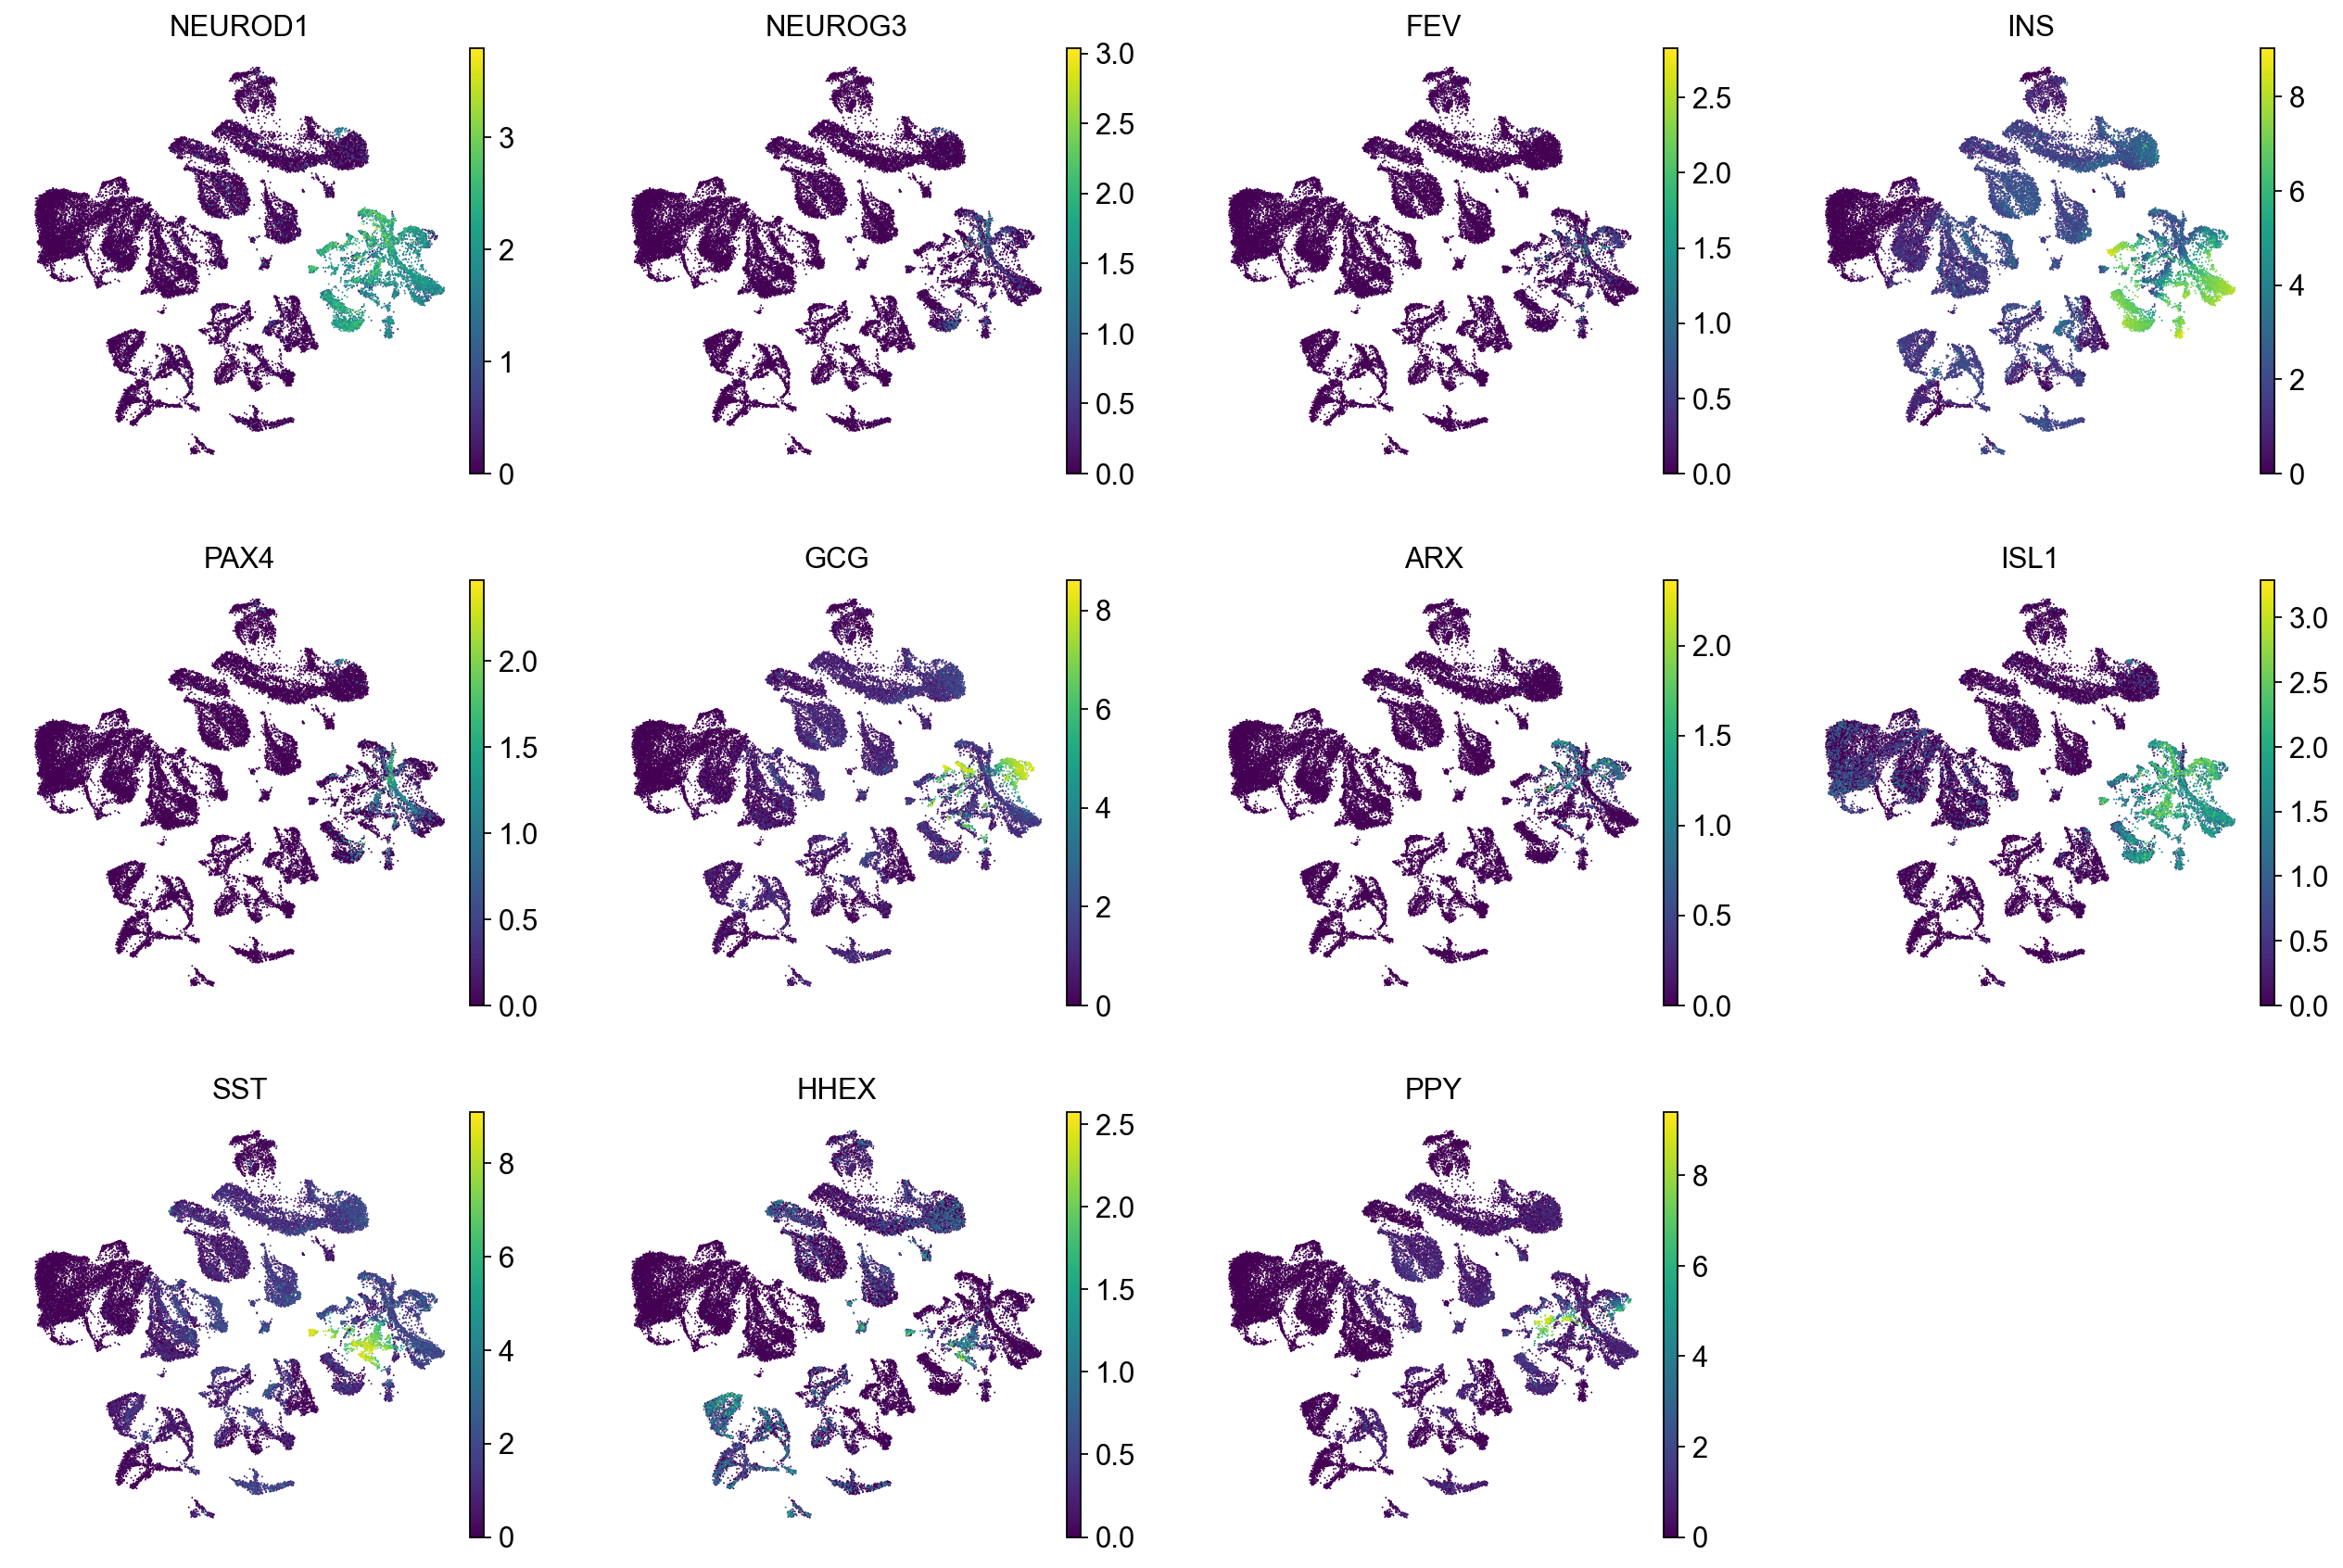

In [15]:
sc.pl.umap(adata, color=['NEUROD1', 'NEUROG3', 'FEV', 'INS', 'PAX4', 'GCG', 'ARX', 'ISL1', 'SST', 'HHEX', 'PPY'])

In [30]:
mk_dict = {
    'epithelial': ['EPCAM', 'PDX1', 'PROX1'],
    'mesenchyme': ['VIM', 'MSLN', 'COL3A1', 'THY1'],
    'neuronal/neuroendocrine': ['ASCL1', 'TUBB3', 'HAND2', 'SYP', 'INSM1', 'NCAM1', 'ENO2'],
    'immune': ['PTPRC'],
    'endothelial': ['PECAM1', 'CDH5'],
    'endocrine': ['NEUROD1', 'CHGA'],
    'acinar/tip': ['CTRB1', 'GP2', 'RBPJL'],
    'ductal/trunk': ['HES1', 'SAT1'],
    'EP': ['NEUROG3', 'FEV'],
    'alpha': ['ARX', 'GCG'],
    'beta': ['PAX4', 'INS'],
    'delta': ['SST', 'HHEX'],
    'PP': ['PPY'],
    'epsilon': ['GHRL']}

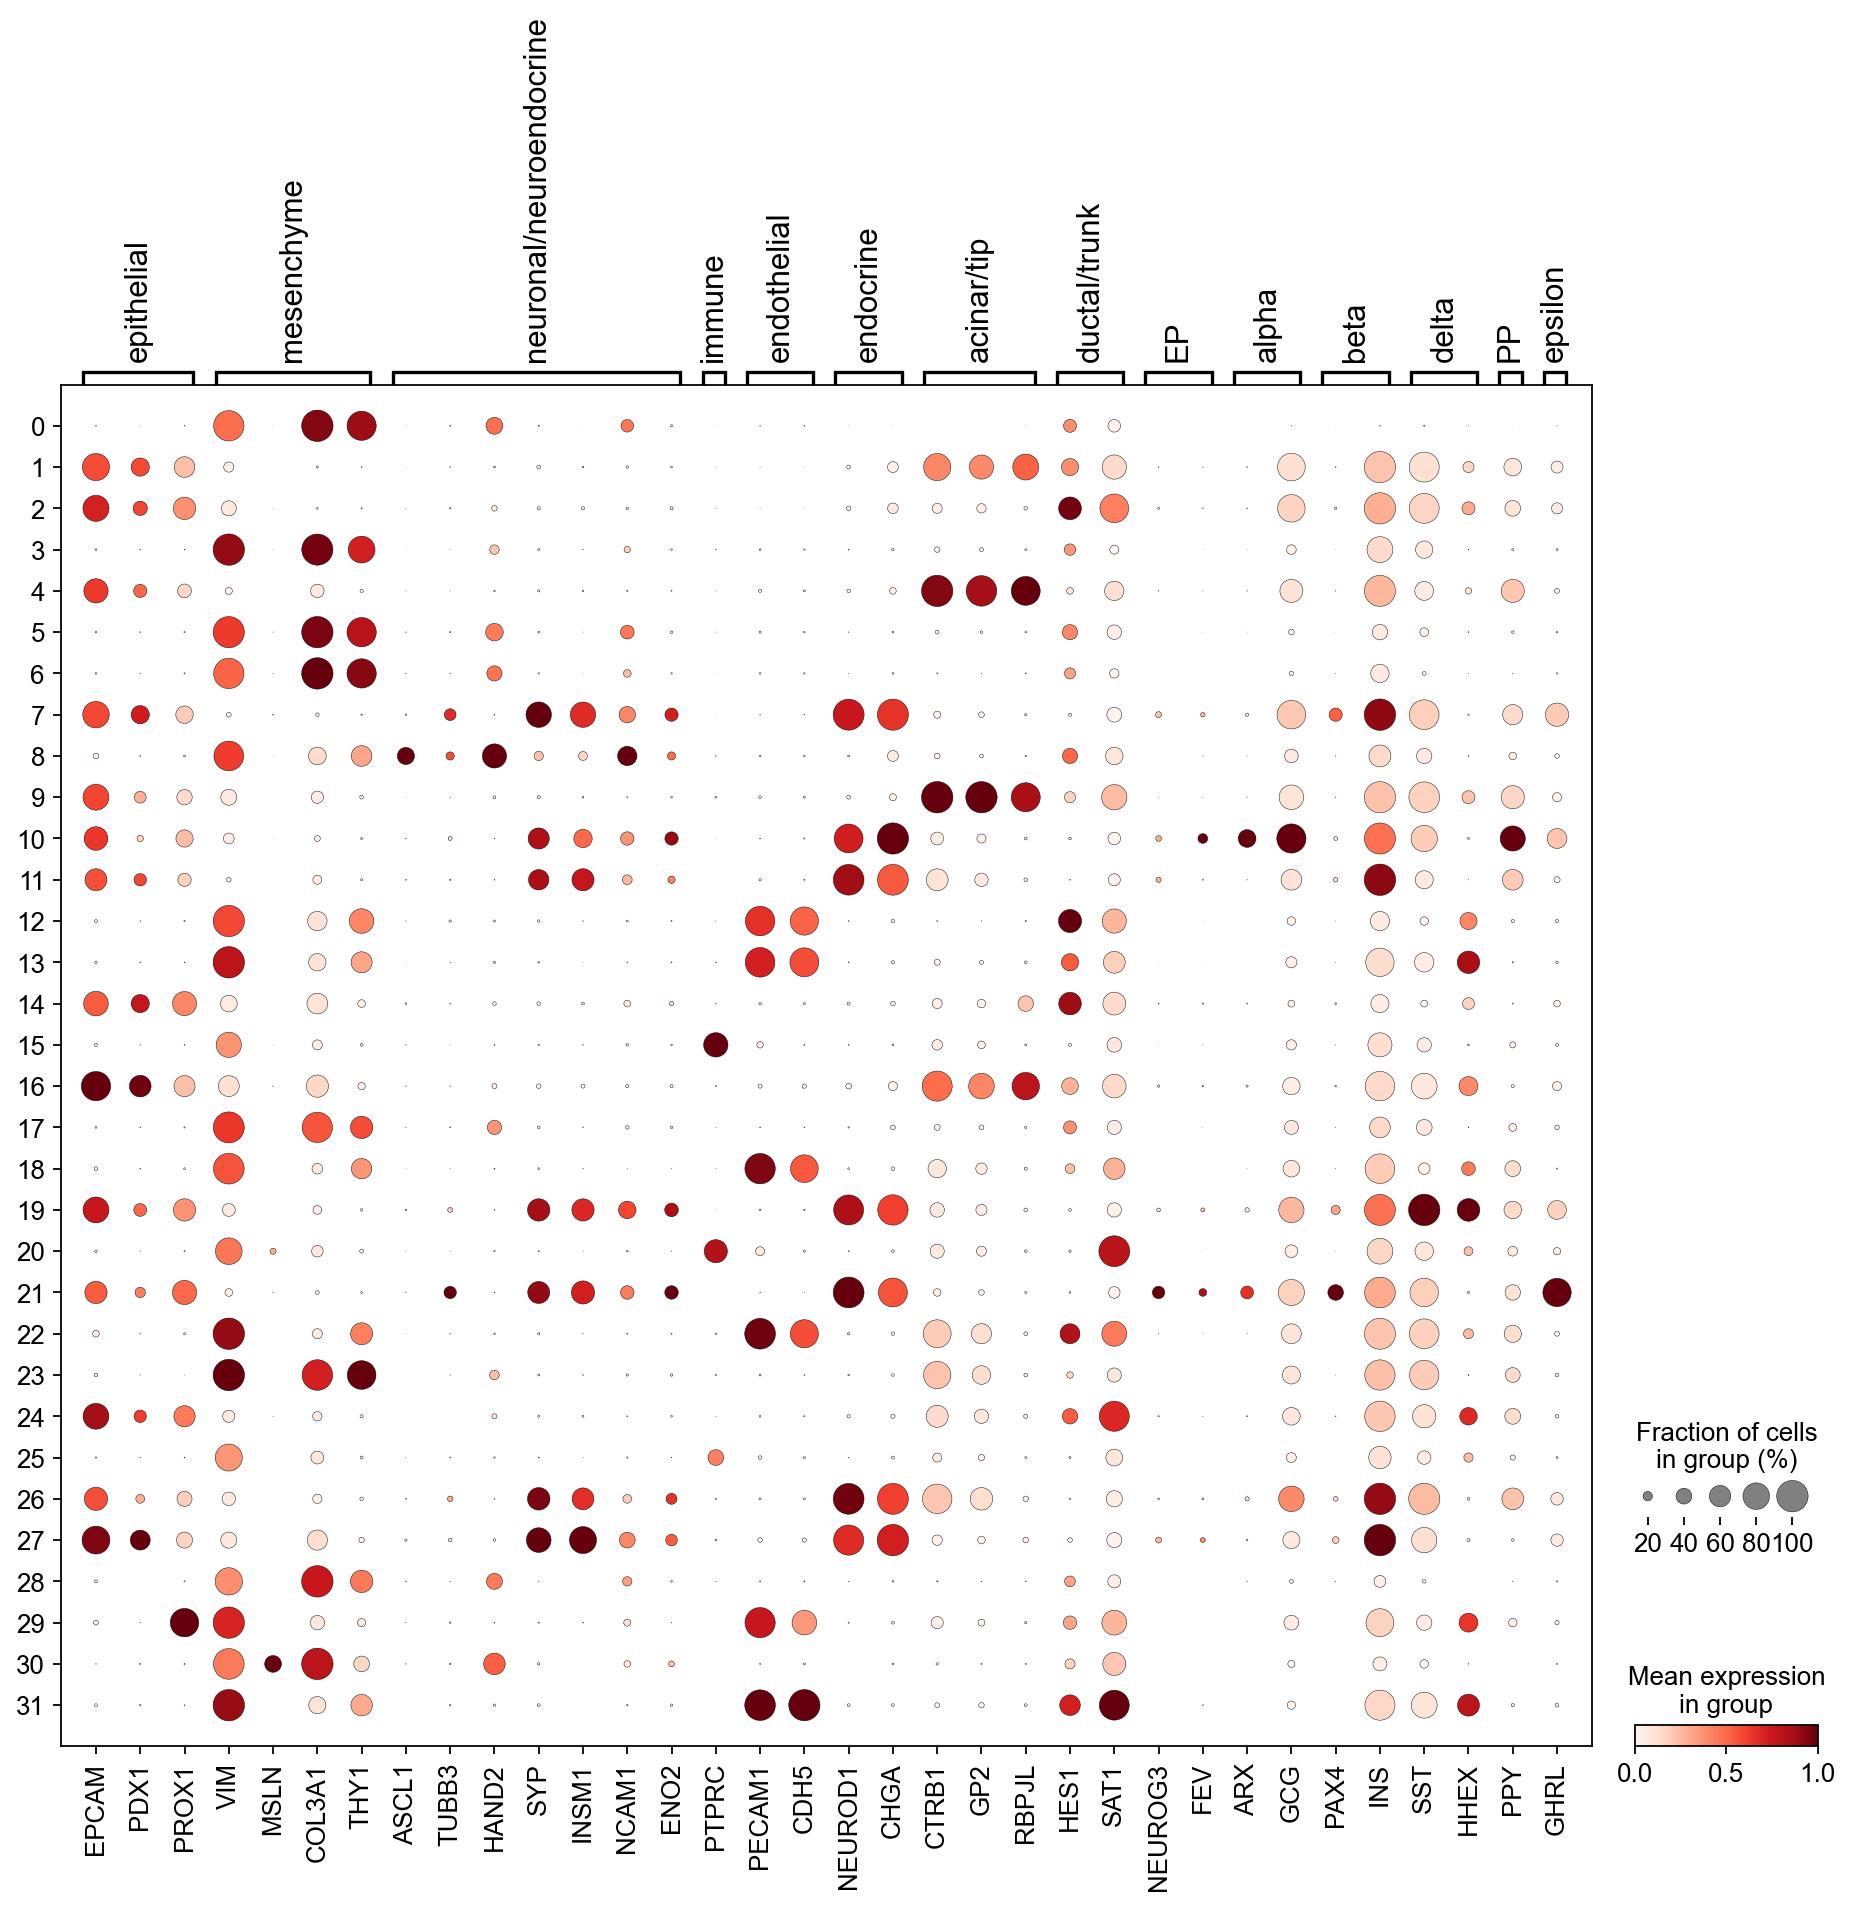

In [31]:
sc.pl.dotplot(adata, groupby='louvain', var_names=mk_dict, standard_scale='var')

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:381: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:383: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:386: Performa

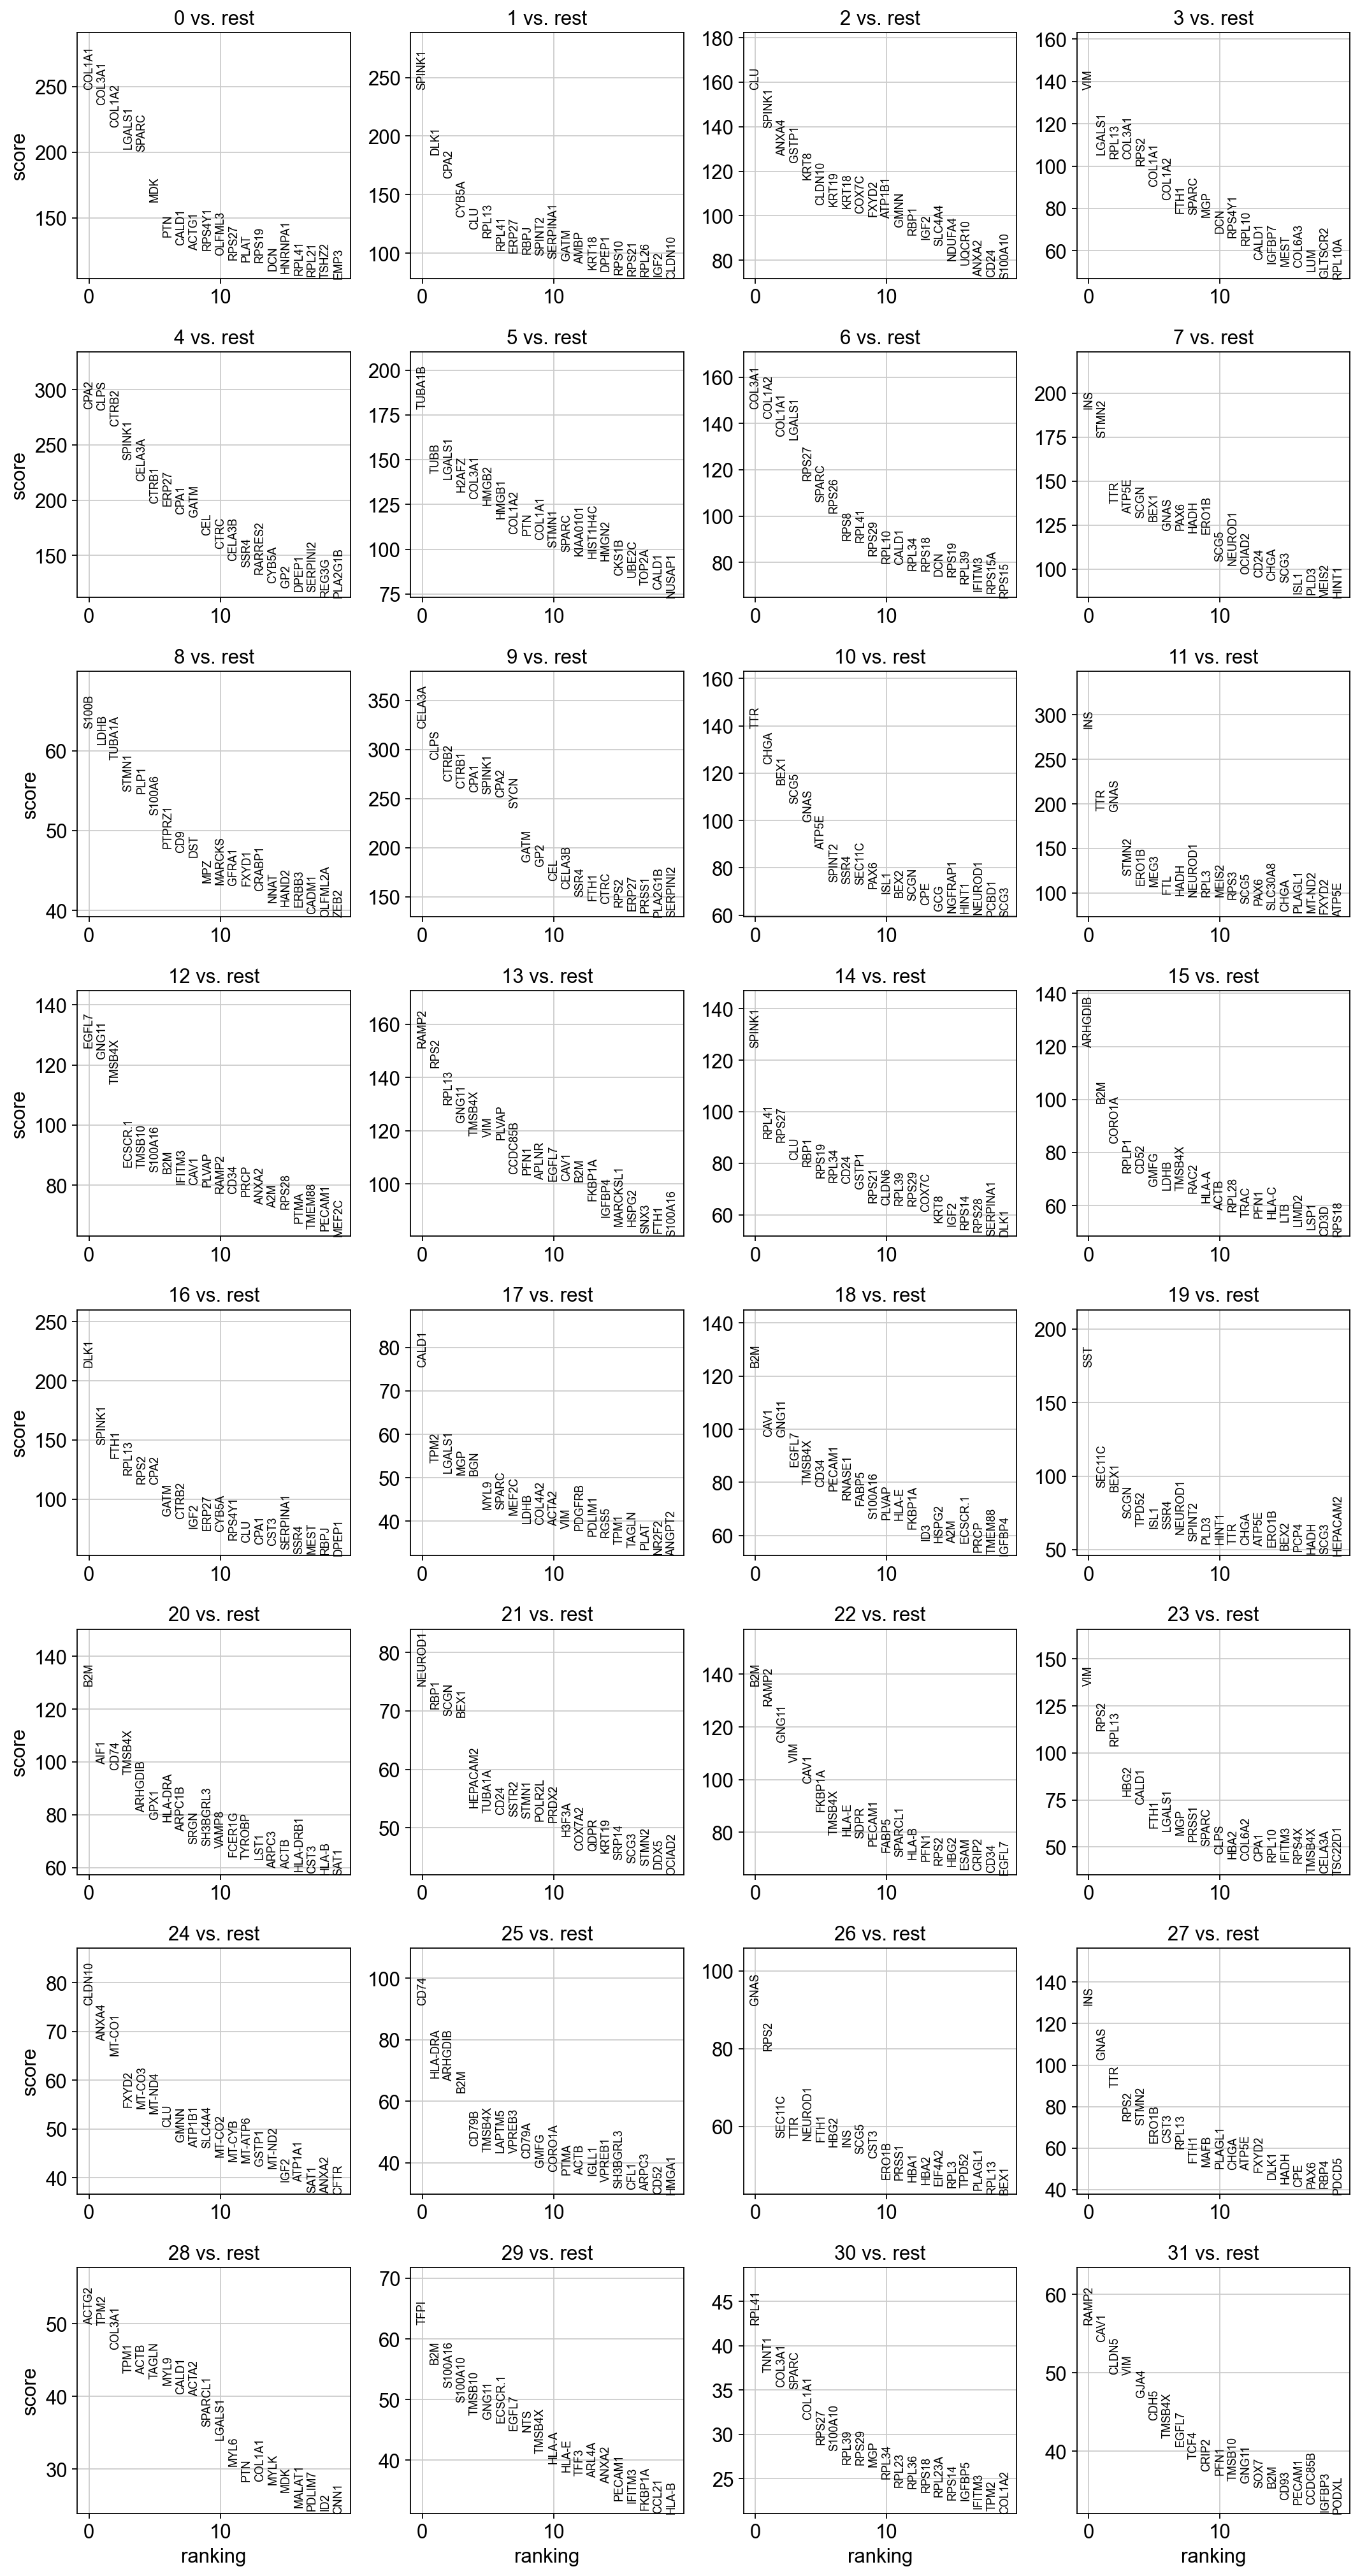

In [20]:
sc.tl.rank_genes_groups(adata, groupby='louvain')
sc.pl.rank_genes_groups(adata, sharey=False)

In [33]:
map_names = {}
for c in adata.obs['louvain'].cat.categories:
    if c in ['7', '10', '11', '19', '21', '26', '27']:
        map_names[c] = 'epithelial endocrine'
    elif c in ['0', '3', '5', '6', '17', '23', '28', '30']:
        map_names[c] = 'mesenchyme'
    elif c in ['15', '20', '25']:
        map_names[c] = 'immune'
    elif c in ['12', '13', '18', '22', '29', '31']:
        map_names[c] = 'endothelial'
    elif c in ['1', '2', '4', '9', '14', '16', '14']:
        map_names[c] = 'epithelial non-endocrine'
    elif c in ['8']:
        map_names[c] = 'neuronal/neuroendocrine'

adata.obs['louvain_anno_broad'] = adata.obs['louvain']
adata.obs['louvain_anno_broad'] = adata.obs['louvain_anno_broad'].map(map_names).astype('category')

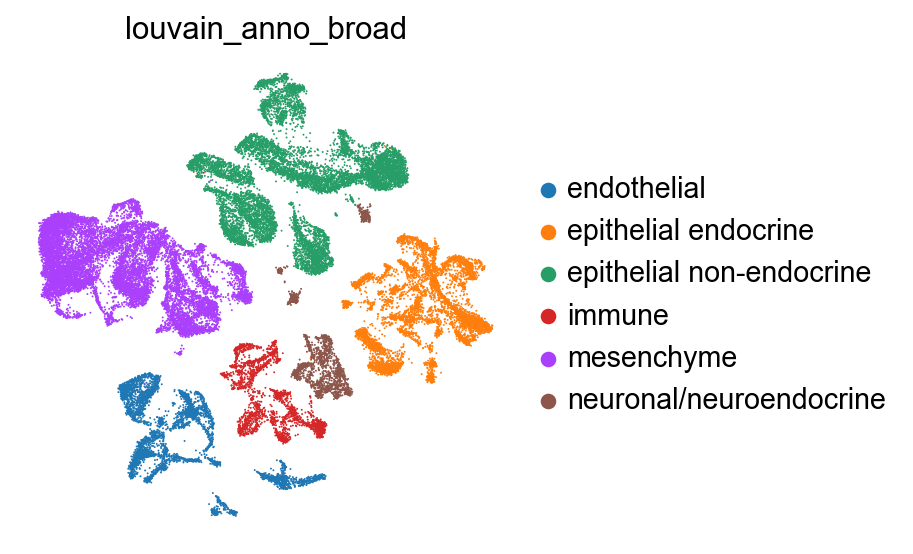

In [34]:
sc.pl.umap(adata, color=['louvain_anno_broad'])

In [41]:
adata_endo = adata[adata.obs.louvain_anno_broad.isin(['epithelial endocrine'])].copy()

In [42]:
sc.pp.highly_variable_genes(adata_endo, n_top_genes=2000)
sc.pp.pca(adata_endo)
sc.pp.neighbors(adata_endo)
sc.tl.umap(adata_endo)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [43]:
sc.tl.louvain(adata_endo, resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


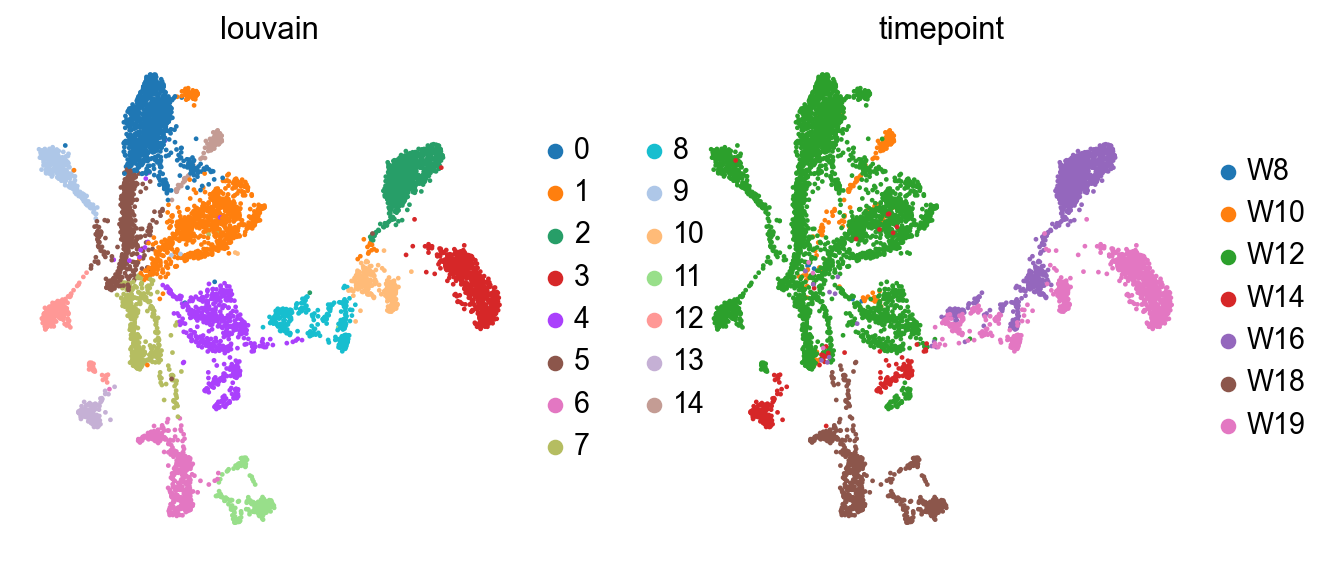

In [44]:
sc.pl.umap(adata_endo, color=['louvain', 'timepoint'])

### overlay timepoints

In [49]:
import bbknn as bbknn

In [50]:
bbknn.bbknn(adata_endo, batch_key='timepoint', approx=False, use_rep='X_pca')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix (0:00:00)


/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]


In [51]:
sc.tl.umap(adata_endo)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [56]:
sc.tl.louvain(adata_endo, resolution=1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [92]:
sc.tl.louvain(adata_endo, resolution=0.7, restrict_to=('louvain', ['5']), key_added='louvain_r')
sc.tl.louvain(adata_endo, resolution=0.5, restrict_to=('louvain_r', ['7']), key_added='louvain_r')
sc.tl.louvain(adata_endo, resolution=0.7, restrict_to=('louvain_r', ['3']), key_added='louvain_r')
sc.tl.louvain(adata_endo, resolution=0.8, restrict_to=('louvain_r', ['2']), key_added='louvain_r')
sc.tl.louvain(adata_endo, resolution=0.7, restrict_to=('louvain_r', ['5,1']), key_added='louvain_r')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_r', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain_r', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 20 clusters and added
    'louvain_r', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'louvain_r', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 23 clusters and added
    'louvain_r', the cluster labels (adata.obs, categorical) (0:00:00)


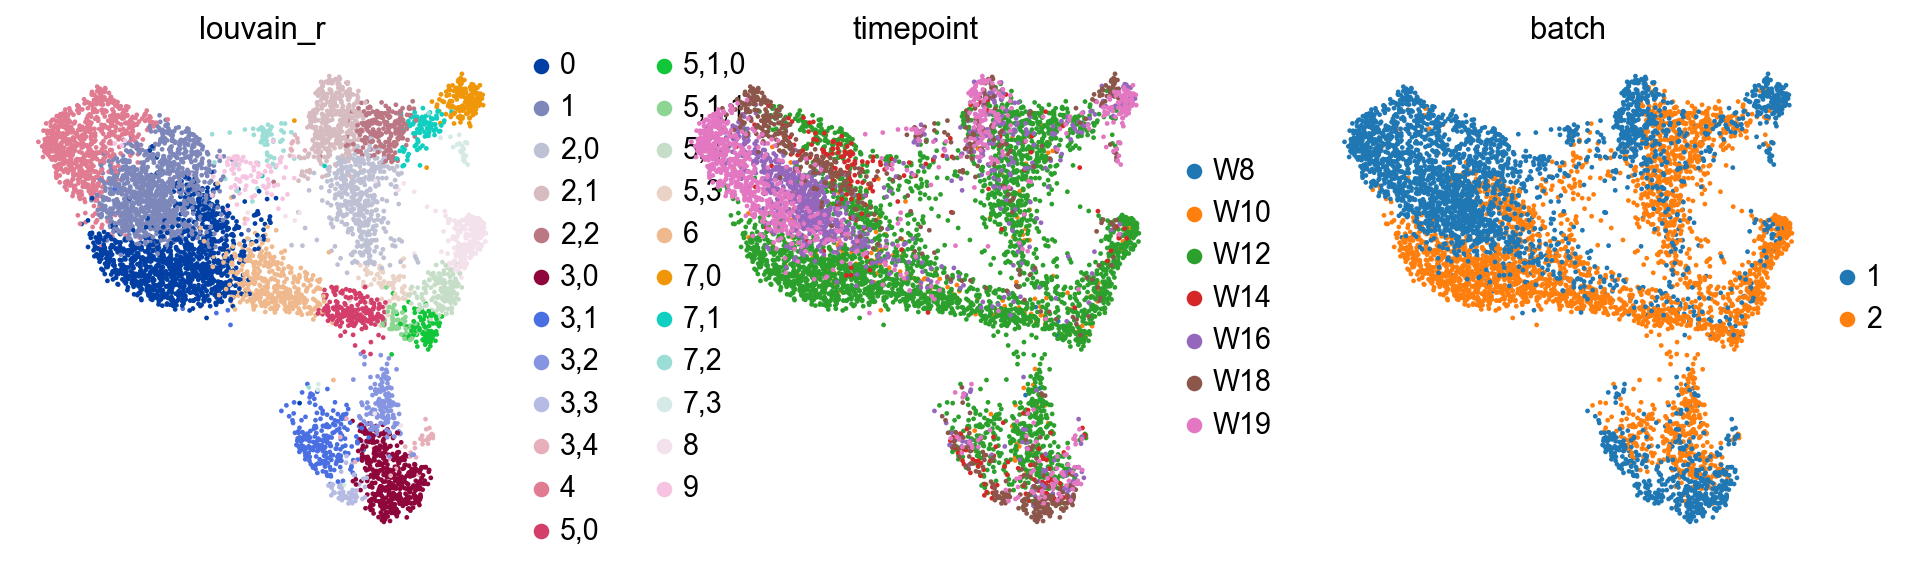

In [93]:
sc.pl.umap(adata_endo, color=['louvain_r', 'timepoint', 'batch'])

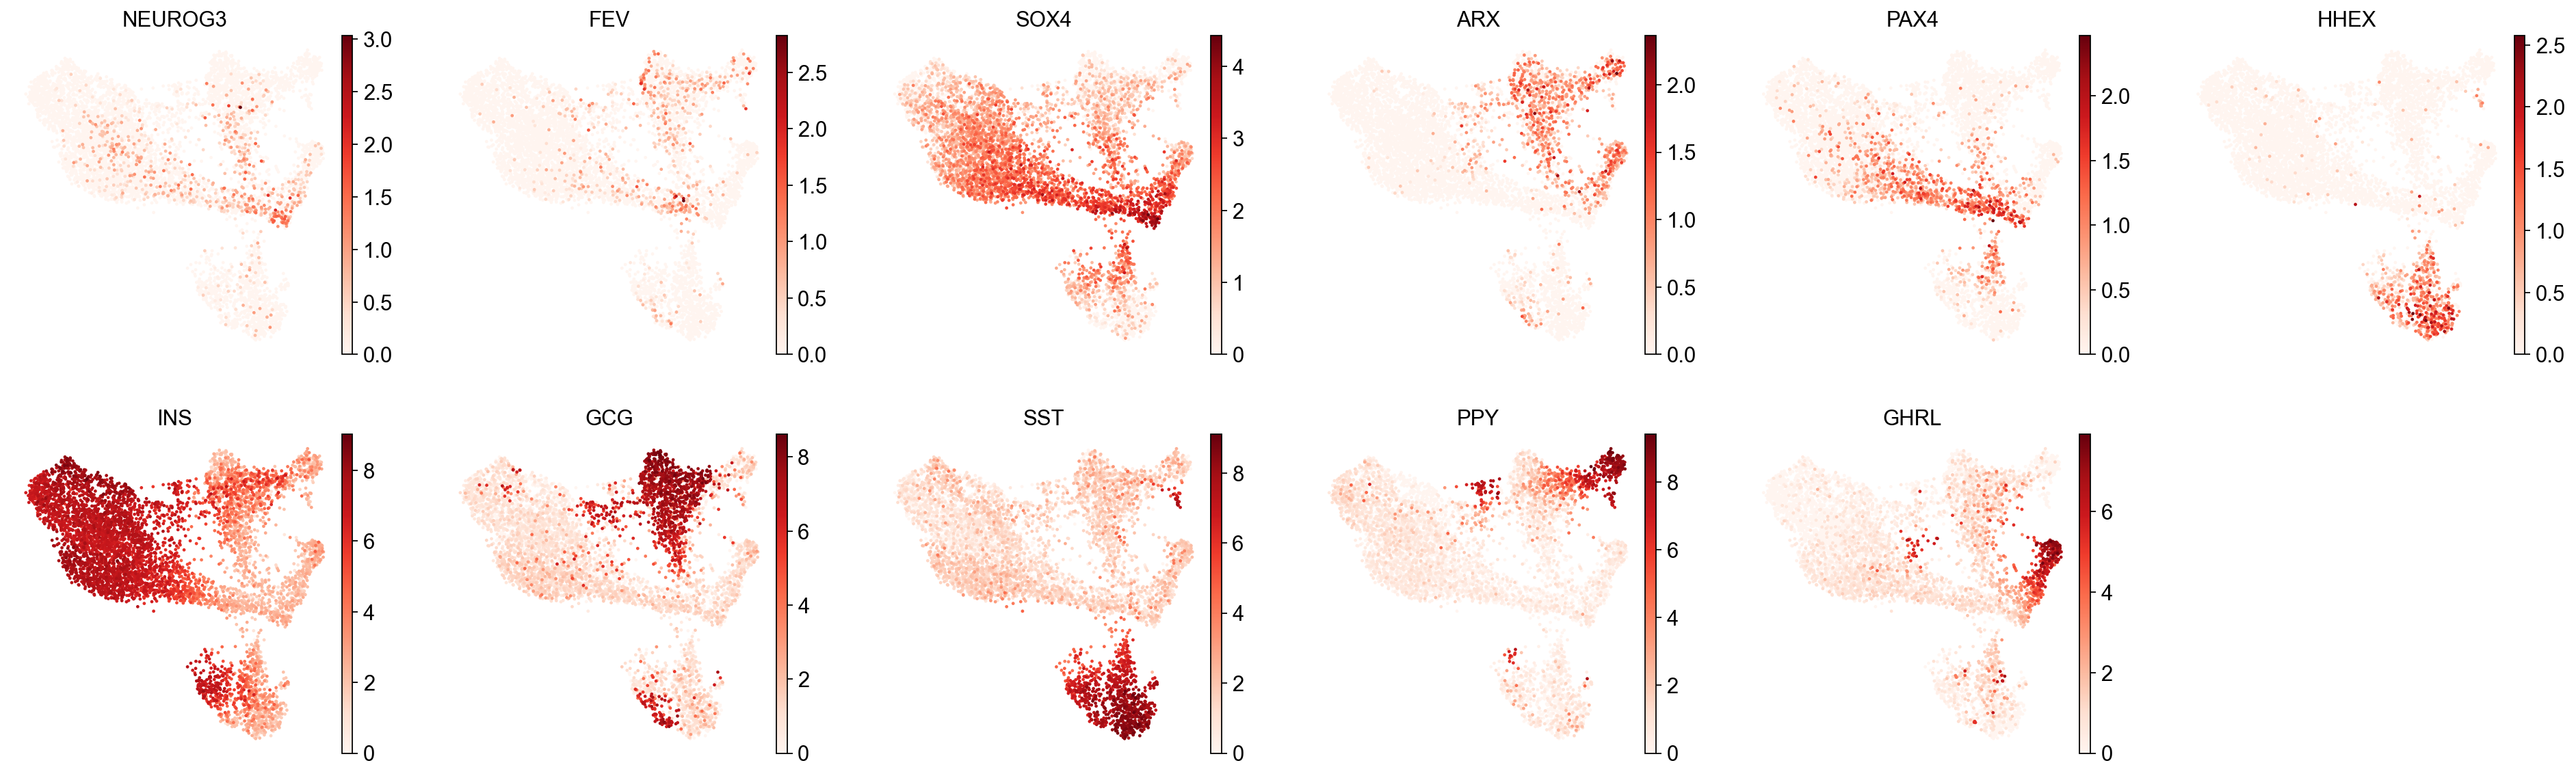

In [58]:
sc.pl.umap(adata_endo, color=['NEUROG3', 'FEV', 'SOX4', 'ARX', 'PAX4', 'HHEX', 'INS', 'GCG', 'SST', 'PPY', 'GHRL'], ncols=6, cmap='Reds')

In [108]:
mk_dict = {
    'EP': ['NEUROG3', 'FEV'],
    'alpha': ['ARX', 'GCG'],
    'PP': ['PPY'],
    'beta': ['PAX4', 'INS'],
    'delta': ['HHEX', 'SST'],
    'epsilon': ['GHRL']}

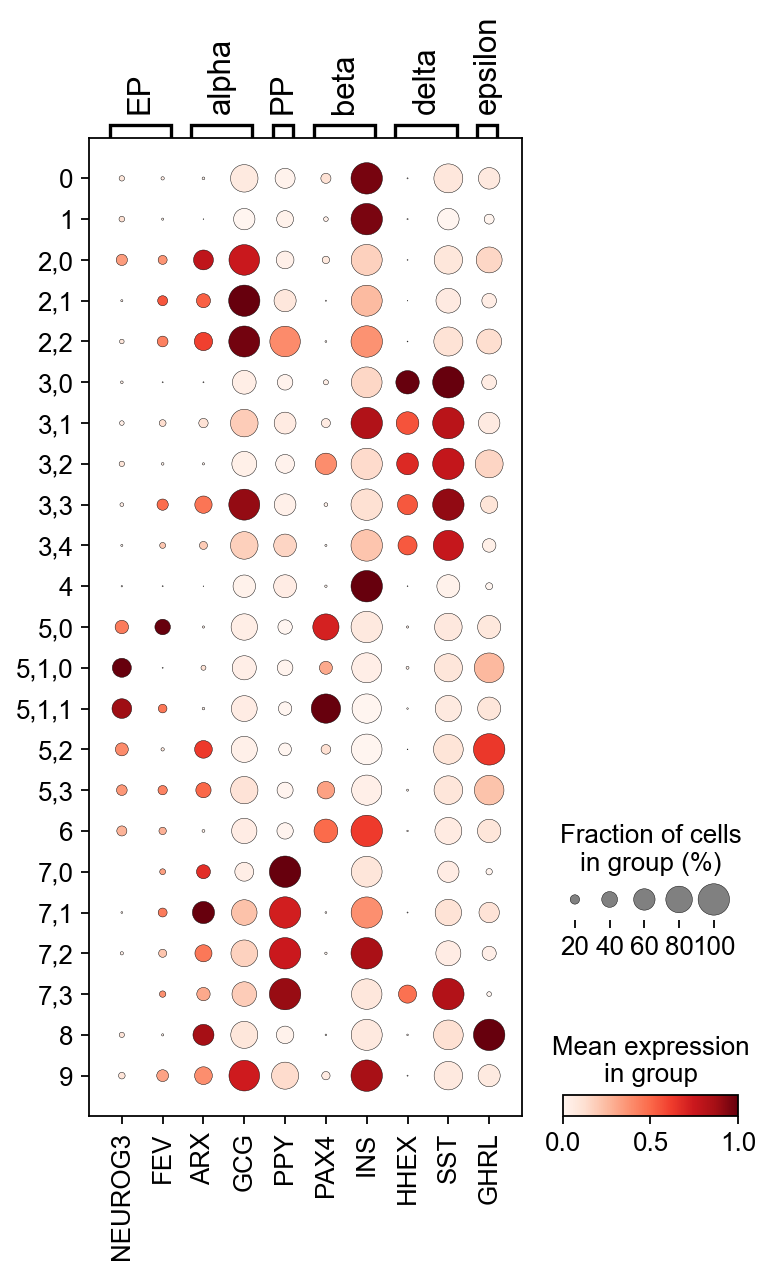

In [109]:
sc.pl.dotplot(adata_endo, groupby='louvain_r', var_names=mk_dict, standard_scale='var')

In [110]:
map_names = {}
for c in adata_endo.obs['louvain_r'].cat.categories:
    if c in ['0', '1', '4']:
        map_names[c] = 'beta'
    elif c in ['5,0', '6', '5,1,1']:
        map_names[c] = 'beta precursor'
    elif c in ['2,1', '2,2']:
        map_names[c] = 'alpha'
    elif c in ['2,0', '5,3']:
        map_names[c] = 'alpha/PP precursor'
    elif c in ['7,1', '7,0']:
        map_names[c] = 'PP'
    elif c in ['5,2', '5,3', '8']:
        map_names[c] = 'epsilon'
    elif c in ['3,2']:
        map_names[c] = 'delta precursor'
    elif c in ['3,0', '3,4']:
        map_names[c] = 'delta'
    elif c in ['5,1,0']:
        map_names[c] = 'Ngn3+ EP'
    elif c in ['4,1', '4,3']:
        map_names[c] = 'epsilon'
    elif c in ['9', '7,2', '7,3', '3,1', '3,3']:
        map_names[c] = 'polyhormonal'

adata_endo.obs['louvain_anno'] = adata_endo.obs['louvain_r']
adata_endo.obs['louvain_anno'] = adata_endo.obs['louvain_anno'].map(map_names).astype('category')

In [111]:
adata_endo.obs['louvain_anno'].cat.reorder_categories([
    'Ngn3+ EP', 'alpha/PP precursor',  'alpha', 'PP', 'beta precursor', 'beta',
        'delta precursor', 'delta', 'epsilon', 'polyhormonal'
], inplace=True)

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  after removing the cwd from sys.path.


In [117]:
adata_endo.uns['louvain_anno_colors'] = ['#fec44f', '#a1d99b', '#279e68', '#8c510a', '#fc9272', '#d62728', '#9ecae1', '#1f77b4', '#e377c2', '#bdbdbd']

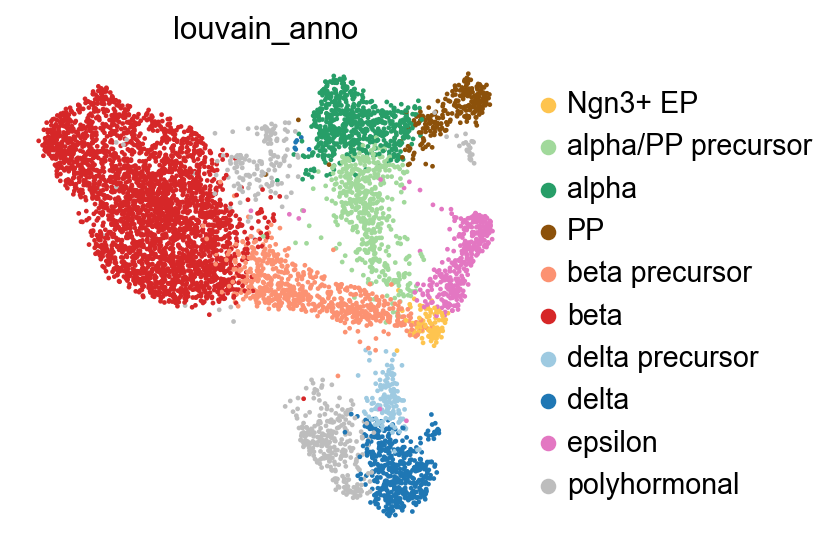

In [118]:
sc.pl.umap(adata_endo, color=['louvain_anno'])

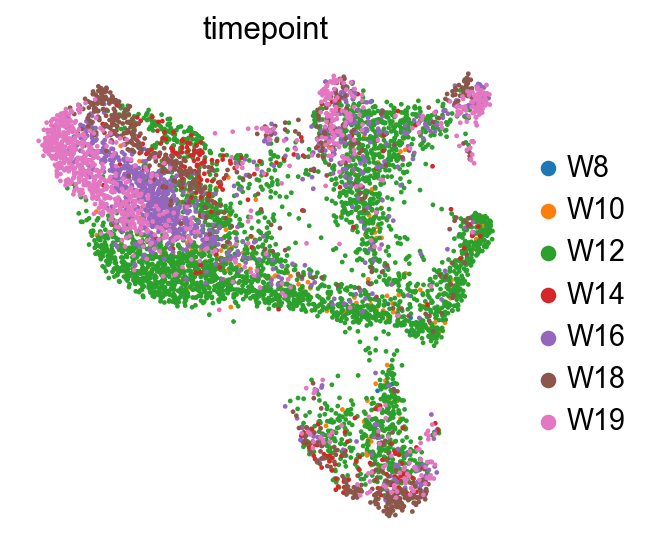

In [123]:
sc.pl.umap(adata_endo, color=['timepoint'])

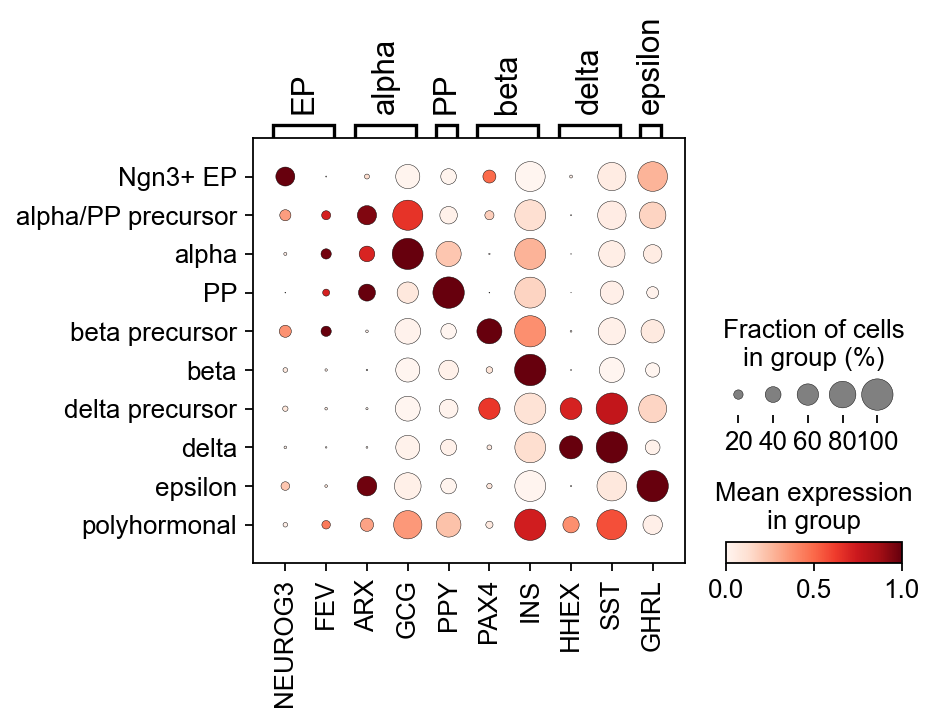

In [113]:
sc.pl.dotplot(adata_endo, groupby='louvain_anno', var_names=mk_dict, standard_scale='var')

In [114]:
adata_endo.write('./data/yu_endo.h5ad')